# Learn how to use a random forest classifier

- What follows is me following through a section in a data science book I've been reading through. 
- I didn't write most of this code, except for when I fiddled around with bits of it to understand better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

In [85]:
# Make a utility function to visualize the output of the classifier
def visualize_classifier(model, X, y, ax=None, cmap='Dark2'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, 
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap=cmap, clim=(y.min(), y.max()),
                                          zorder=1)
    
    ax.set(xlim=xlim, ylim=ylim)

In [7]:
# Make blobs. X is the features matrix, y is the target array.
X, y = make_blobs(n_samples=300, centers=4,
          random_state=0, cluster_std=1)

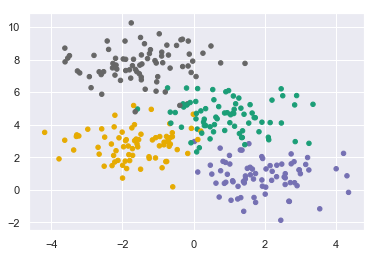

In [8]:
# Make a scatter plot of the features matrix colored by the target array
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='Dark2')

In [91]:
# Fit the features matrix and target array.
tree = DecisionTreeClassifier().fit(X, y)

In [103]:
# Tree is now a DecisionTreeClassifier object with the arguments that were passed to it.
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

C:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


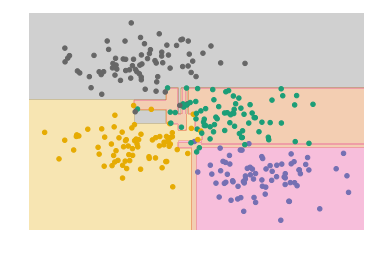

In [87]:
visualize_classifier(DecisionTreeClassifier(), X, y);

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

C:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


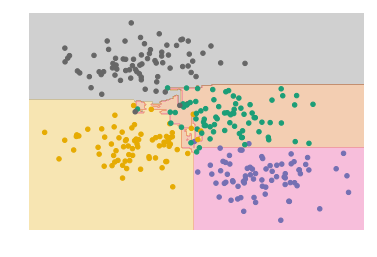

In [107]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                       random_state=1)  # max_samples means we've max given the bagging classifier 80% of the training points.

bag.fit(X, y)
visualize_classifier(bag, X, y)

- Closer to the actual data, nice

### Use RandomForest classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

C:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


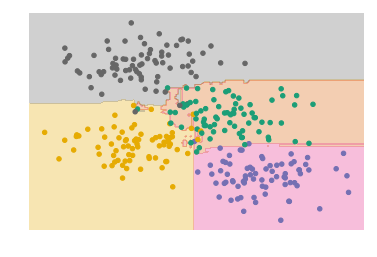

In [110]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)  # 100 trees in the forest to get more accurate data

## Random forest regression

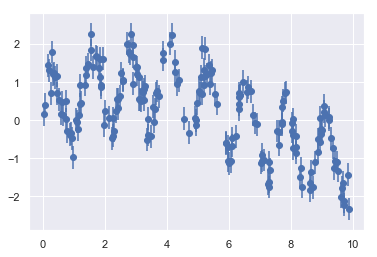

In [131]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x, sigma=0.3)
plt.errorbar(x, y, 0.3, fmt='o');

In [152]:
x[:, None].shape

(200, 1)

In [150]:
y.shape

(200,)

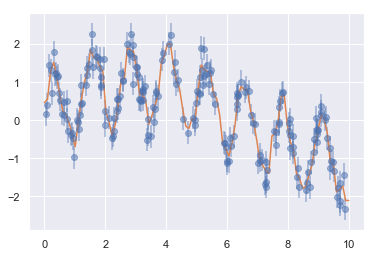

In [159]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 100)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-')

# For classifying digits

This should be the money tutorial, since it's on image classification.

In [226]:
from sklearn.datasets import load_digits
from pprint import pprint
digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

- The data structure of digits['images'] is how I'm going to want to set up the fMRI data. Need to deeply understand how it's built.

In [227]:
digits.images.shape  # 1797 x 8 x 8
digits.images[1].shape

(8, 8)

- 1797 'slices', each with an 8x8 pixel grid. Cool.
- Get equivalent 2d slices in the fmri data with mri1_data[:, :, 15, t].
- Target array y will classify as being from mri1_data or mri2_data.
- Think about whether I need to split into testing and training data.
- Incorporating the time information will be the tricky bit, since it's different and this handwritten digit example doesn't use time information
- Use the 0th high contrast time point?

In [233]:
digits.data.shape

(1797, 64)

In [243]:
digits.target.shape

(1797,)

In [232]:
type(digits.data)

numpy.ndarray

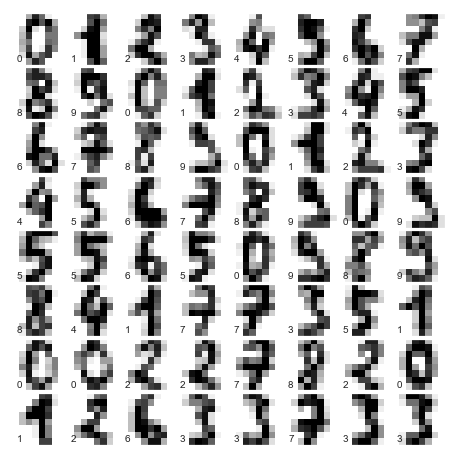

In [203]:
# Set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the digits
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks = [])
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    
    ax.text(0, 7, str(digits.target[i]))

In [208]:
from sklearn.cross_validation import train_test_split  # What's this? could be useful

# Looks like it's for splitting data into training and testing groups.
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, 
                                               random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)  # So model.fit must add information to the 'model' object itself.

In [211]:
digits.data.shape

(1797, 64)

In [209]:
Xtrain.shape

(1347, 64)

In [217]:
all(digits.images[1].ravel() == digits.data[1])

True

- Aha! digits.data is just the 1-dimensional version of digits.images.
- For each slice, in the fMRI data, I'm going to have to np.ravel() it.
- train_test_split outputs Xtrain, which is the same shape as digits.data

In [219]:
from sklearn import metrics  # Results Reporter module?

print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



- ypred is the predicted classification of Xtest. In the fMRI data, this will be 0s and 1s.
- ytest is what the y-values actually should be.
- This report gives information about how well the model did to predict "unclassified" information, whose classification is actually known.

- We'll call it a stretch goal to get something like this done.
- Not going to show this in the final output.